# Practical Lab 1 - Univariate Linear Regression on the California Housing Prices Dataset

## Ayush Nikulkumar Patel_9033358_Section-2

##### 1. Framing the Problem - The primary goal of this report is to explore how different factors such as longitude, latitude, housingMedianAge, totalRooms,totalBedrooms, population, households, etc affect the housing price in California by analyzing the dataset. The report aims to determinants housing prices using various predictive models and provides actionable insights for California Housing Prices.

##### 2. Getting the Data - Get the dataset of California Housing Price form the Kaggle(https://www.kaggle.com/code/sparky42/starter-california-housing-prices-371617f9-6)


##### Loading data into Pandas:

In [8]:
import pandas as pd

data_file_path = 'housing.csv'  
housing_data = pd.read_csv(data_file_path)

# Display the first few rows of the DataFrame to confirm it loaded correctly
print(housing_data.head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


##### 3.Exploratory Data Analysis (EDA)

##### 3.1 Explore statistics (e.g. using Pandas `describe` function) 

In [9]:
housing_data.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


##### 3.2 Create three Seaborn scatter plots of median house value vs. median income, population and number of households. There should be one scatter plot per each independent variable. Add a title to each graph (using Seaborn). Provide textual interpretation of the graphs, and insights specific to the linear regression you are going to conduct next. 

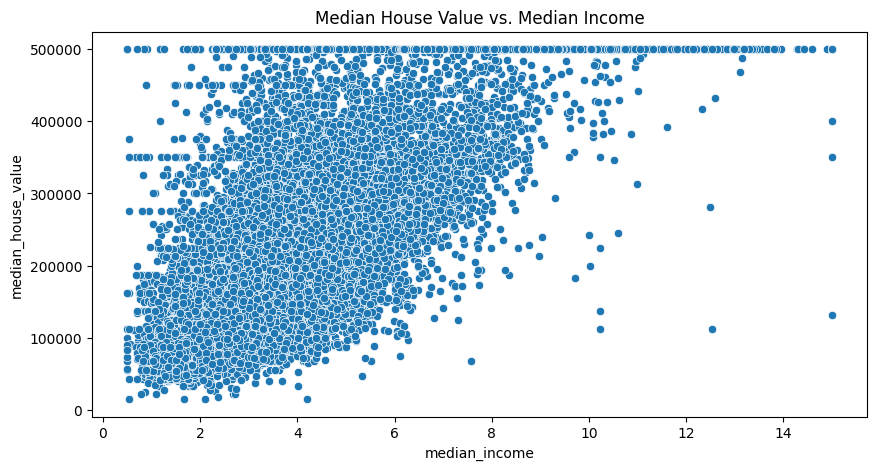

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Median Income
plt.figure(figsize=(10, 5))
sns.scatterplot(data=housing_data, x='median_income', y='median_house_value')
plt.title('Median House Value vs. Median Income')
plt.show()



This scatter plot shows a clear positive relationship between median income and median house value. As a median income increases, the median house value also tends to rise as well. This suggests higher income are likely to have more expensive housing, indicating that income is a significant predictor of house value. This relationship will be further explored in the linear regression analysis, where we expect to see a strong correlation reflected in the model’s coefficients.

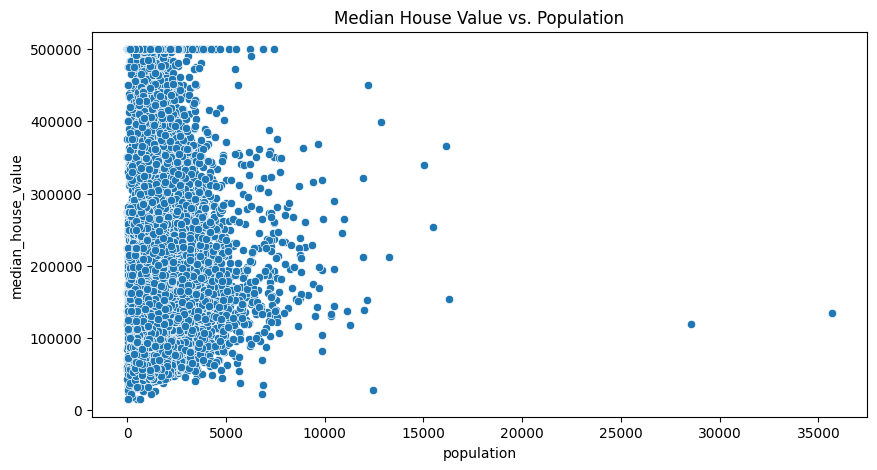

In [11]:
# Population
plt.figure(figsize=(10, 5))
sns.scatterplot(data=housing_data, x='population', y='median_house_value')
plt.title('Median House Value vs. Population')
plt.show()


This scatter plot illustrate relationship between population and median house value is less pronounced compared to median income. While there may be clusters of higher house values in more populated areas, there are also instances where low populations coincide with high house values. This suggests that population alone may not be a reliable predictor of house value. The upcoming regression analysis will help clarify this relationship by quantifying the degree of influence population has on housing prices.

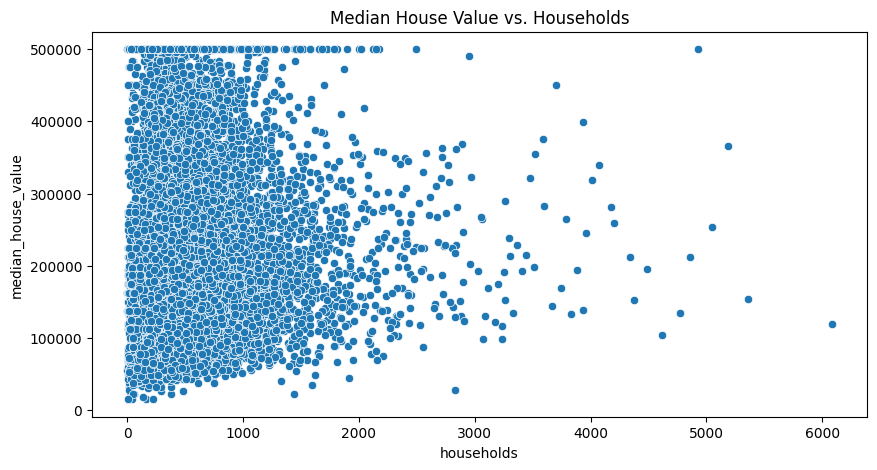

In [12]:
# Number of Households
plt.figure(figsize=(10, 5))
sns.scatterplot(data=housing_data, x='households', y='median_house_value')
plt.title('Median House Value vs. Households')
plt.show()

This scatter plot reveals a moderate positive correlation between the number of households and median house value. Areas with a higher number of households tend to have higher house values, although there are significant variations. This suggests that while household count may impact housing demand and prices, other factors likely play a substantial role as well. The linear regression analysis will aim to quantify this relationship and assess how much of the variance in house values can be explained by the number of households.

##### 3.3 Based on the above, describe the 4 variables used in this lab. Observations such as their meaning, range and additional characteristics that you notice. This should be concise, and relevant.


Median House Value:
Meaning: It represents the median value of residential properties in a given area.
Range: The range of house value is depends on many factors and it's between 30000 to 500000.
Characteristics: Which shows the demand of house, influenced by factors such as population, households, and income.

Median Income:
Meaning: Indicates the median household income in a specified area, which shows the economic status of residents.
Range: Range of income is measured in tens of thousands of US Dollars between 0.5 to 15
Characteristics: Higher median incomes often correlate with increased purchasing power, leading to higher housing demand and prices. It serves as a strong predictor of median house value.

Population:
Meaning: Refers to the total number of residents in a specific geographic area, which can create impact on median house value .
Range: Here range is between 0 to 38000 within a block.
Characteristics: A growing population typically leads to increased demand for housing; however, it will not create more impact on it.

Households:
Meaning: Represents the total number of residential units occupied by one or more than one people.
Range: Range of households is between 0 to 6200.
Characteristics: The number of households provides insight into housing demand, it does not always correlate directly with median house values.


##### 3.4 Run three linear regressions (fitting) between: median house value vs. median income, median house value vs. population, median house value vs. number of households.

In [13]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the dataset
data = pd.read_csv('housing.csv')  # Ensure this file is in your working directory

# Initialize a dictionary to store model results
models = {}

# Define the independent variables
features = ['median_income', 'population', 'households']

# Loop through each feature and perform linear regression
for feature in features:
    X = data[[feature]]  # Independent variable
    y = data['median_house_value']  # Dependent variable

    # Create and fit the model
    model = LinearRegression().fit(X, y)

    # Make predictions
    predictions = model.predict(X)

    # Calculate metrics
    mse = mean_squared_error(y, predictions)
    mae = mean_absolute_error(y, predictions)

    # Store results
    models[feature] = {
        'intercept': model.intercept_,
        'slope': model.coef_[0],
        'mse': mse,
        'mae': mae
    }

# Print the results
for feature, metrics in models.items():
    print(f"Model: Median House Value vs. {feature}")
    print(f"  Intercept: {metrics['intercept']:.2f}")
    print(f"  Slope: {metrics['slope']:.2f}")
    print(f"  Mean Squared Error (MSE): {metrics['mse']:.2f}")
    print(f"  Mean Absolute Error (MAE): {metrics['mae']:.2f}")
    print()


Model: Median House Value vs. median_income
  Intercept: 45085.58
  Slope: 41793.85
  Mean Squared Error (MSE): 7011311502.93
  Mean Absolute Error (MAE): 62625.93

Model: Median House Value vs. population
  Intercept: 210436.26
  Slope: -2.51
  Mean Squared Error (MSE): 13307412412.39
  Mean Absolute Error (MAE): 91153.82

Model: Median House Value vs. households
  Intercept: 196928.58
  Slope: 19.87
  Mean Squared Error (MSE): 13257776904.73
  Mean Absolute Error (MAE): 90802.74



##### 3.5 In a single table for all three linear regressions, provide per regression model: intercept and slope, Mean Squared Error, Mean Absolute Error.

In [14]:
# Convert models dictionary into a DataFrame
results_df = pd.DataFrame.from_dict(models, orient='index')

# Reset the index to make 'Feature' a column
results_df.reset_index(inplace=True)
results_df.rename(columns={'index': 'Feature'}, inplace=True)

# Print the results table
print(results_df)


         Feature      intercept         slope           mse           mae
0  median_income   45085.576703  41793.849202  7.011312e+09  62625.933791
1     population  210436.262076     -2.511753  1.330741e+10  91153.820095
2     households  196928.577162     19.872775  1.325778e+10  90802.743243


##### 3.6 Plot the resulting line on top of the scatter data for each of the three models (three separate graphs), add the line parameters (intercept and slope), MSE and MAE to the graph (you can use a text box). You can use any plotting library for that (Matplotlib, Seaborn or Plotly).

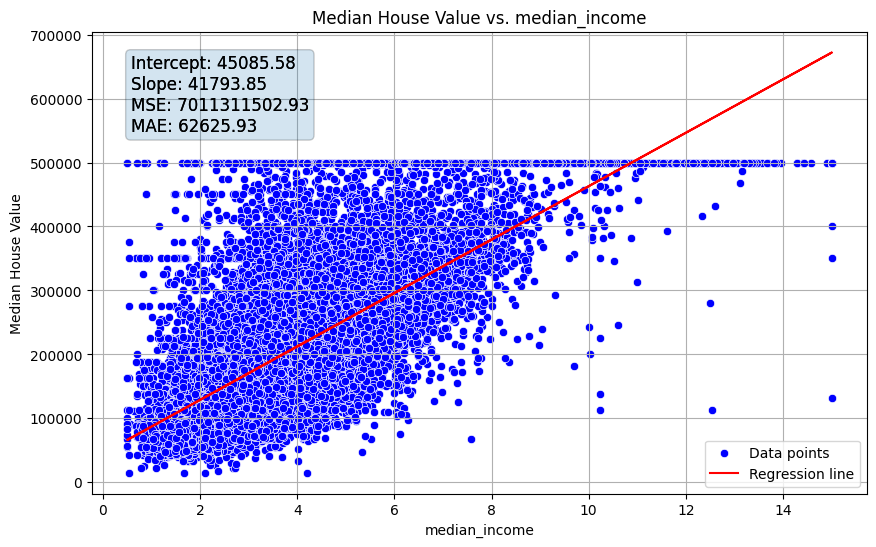

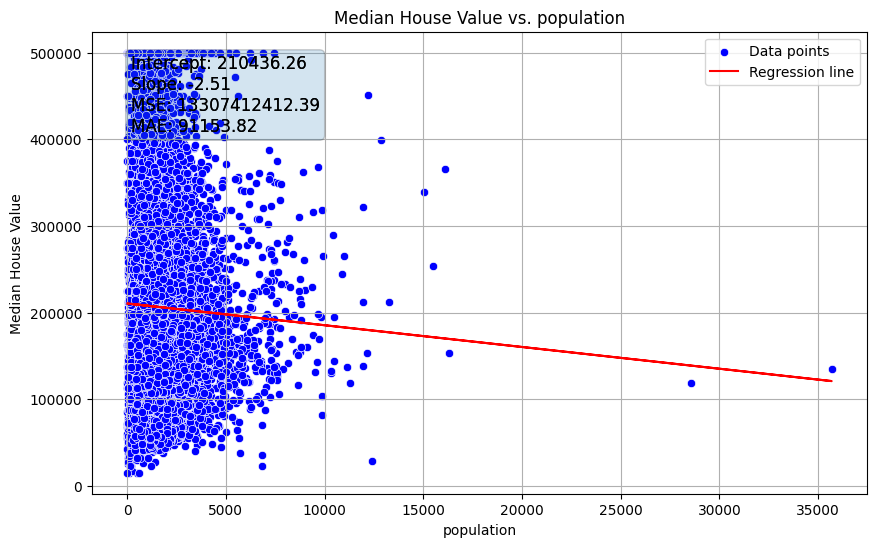

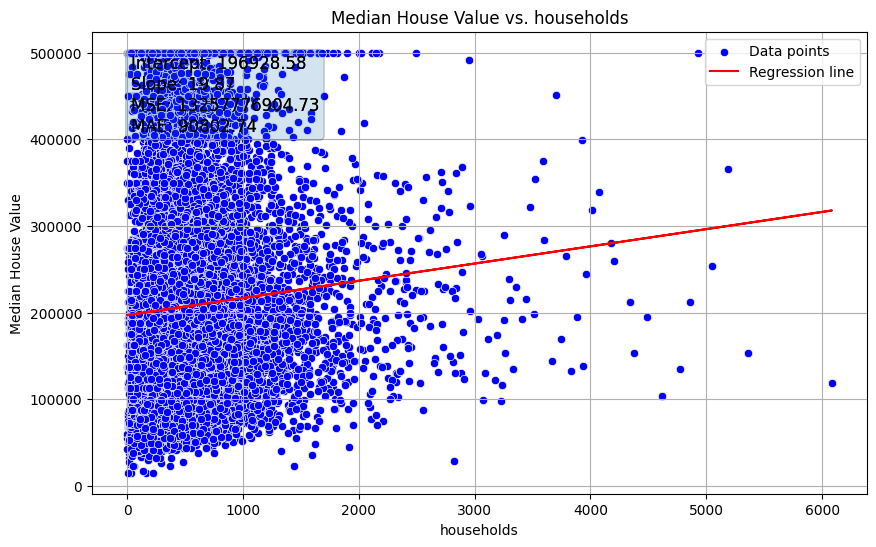

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the dataset
data = pd.read_csv('housing.csv')  

# Initialize a list to store model results
results = []

# Define the independent variables
features = ['median_income', 'population', 'households']

# Loop through each feature and perform linear regression
for feature in features:
    X = data[[feature]]  # Independent variable
    y = data['median_house_value']  # Dependent variable

    # Create and fit the model
    model = LinearRegression().fit(X, y)

    # Make predictions
    predictions = model.predict(X)

    # Calculate metrics
    mse = mean_squared_error(y, predictions)
    mae = mean_absolute_error(y, predictions)

    # Append results to the list
    results.append({
        'Feature': feature,
        'Intercept': model.intercept_,
        'Slope': model.coef_[0],
        'MSE': mse,
        'MAE': mae
    })

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Plotting
for index, row in results_df.iterrows():
    feature = row['Feature']
    intercept = row['Intercept']
    slope = row['Slope']
    
    # Create a scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[feature], y=data['median_house_value'], color='blue', label='Data points')
    
    # Plot the regression line
    x_range = data[feature].values
    y_line = intercept + slope * x_range
    plt.plot(x_range, y_line, color='red', label='Regression line')
    
    # Adding text box for metrics
    textstr = f'Intercept: {intercept:.2f}\nSlope: {slope:.2f}\nMSE: {row["MSE"]:.2f}\nMAE: {row["MAE"]:.2f}'
    plt.gca().add_artist(plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes,
                                   fontsize=12, verticalalignment='top',
                                   bbox=dict(boxstyle='round', alpha=0.1)))

    # Labels and title
    plt.title(f'Median House Value vs. {feature}')
    plt.xlabel(feature)
    plt.ylabel('Median House Value')
    plt.legend()
    plt.grid()
    plt.show()


##### 3.7 Summary: provide a conclusion. Compare the models in terms of their goodness-of-fit, and add additional insights you observed.

In summary, median income create huge impact on housing prices as compared to other factors, such as population and household count, play less critical roles. If we compare the households and population then households creates the more impact rather than household.